# Entropy

## Dependency

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import collections
plt.style.use('default')

**Entropy** $H$ in information theory means that everything is great and happy, and surprising things convey more information. Surprising means something unpredictable, such as probability 0.5. It's unpredictable whether the outcome will be positive or negative. $x$ is data values. $p$ is probability.

$$
H = - \sum_{i = 1}^{n} p(x_i) \log_2(p(x_i))
$$

The reason why we have negative sign after summation is because, when we take log of a number between 0 and 1 (e.g. probability), the log returns negative numbers. So the summation of negative numbers will be negative, but for convenience, we make it positive by multiplying -1.

- High entropy, the dataset has a lot of variability.
- Low entropy, most of the values of the dataset repeat (redundant).

Entropy conveys something about data dispersion like variance, but entropy is nonlinear and makes no assumptions about the distribution. But variance depends on the validity of the mean, and therefore variance is appropriate for roughly normal data.

## Entropy of discrete random variable

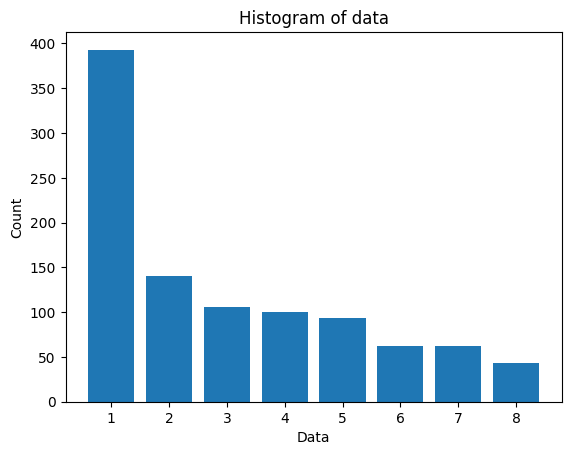

probs: [0.393 0.14  0.106 0.1   0.094 0.062 0.062 0.043]



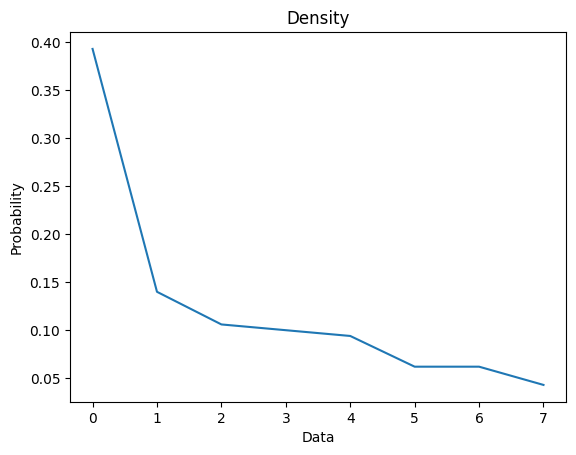

Entropy: 2.62


In [40]:
n = 1000
data = np.ceil(8 * np.random.rand(n)**2)

# Get probability of getting each data
u = np.unique(data)
probs = np.zeros(len(u))
for ui in range(len(u)):
    probs[ui] = sum(data == u[ui]) / n

counter = collections.Counter(data)
    
plt.bar(counter.keys(), counter.values())
plt.title('Histogram of data')
plt.xlabel('Data')
plt.ylabel('Count')
plt.show()

print(f'probs: {probs}')
print()

plt.plot(probs)
plt.title('Density')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.show()

# Apply formula of entropy
entropy = -sum(probs * np.log2(probs))
print(f'Entropy: {entropy:.2f}')

## Entropy of continuous random variable

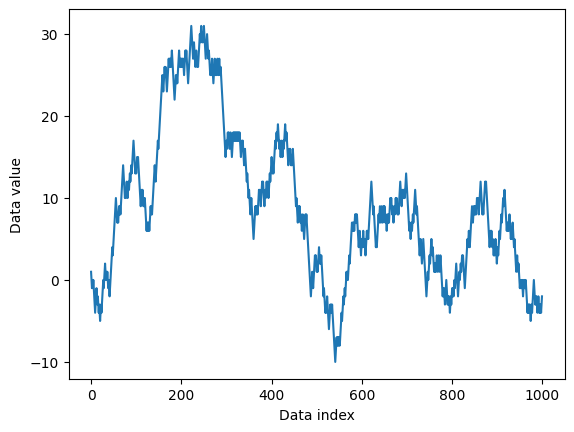

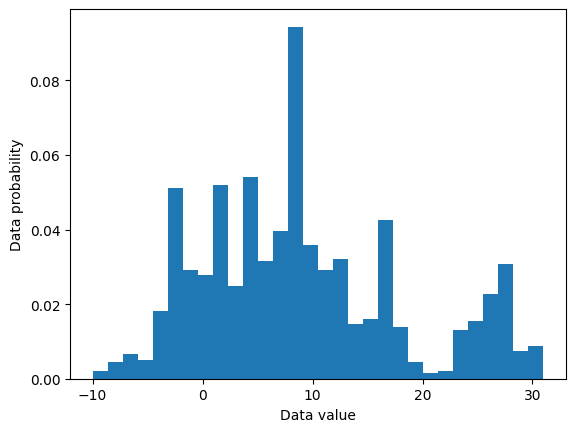

Entropy: 4.97


In [41]:
n = 1000
brown_noise = np.cumsum(np.sign(np.random.randn(n)))

plt.plot(brown_noise)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

plt.hist(brown_noise, density=True, bins=30)
plt.xlabel('Data value')
plt.ylabel('Data probability')
plt.show()

# To compute entropy, we need to dicretize this continuous values by bin
bins = 50

# Get probability from the data
counts, bin_values = np.histogram(brown_noise, bins)
probs = counts / sum(counts)

# +np.finfo(float).eps to avoid log of 0, which cannot compute
entropy = -sum(probs * np.log2(probs + np.finfo(float).eps))

print(f'Entropy: {entropy:.2f}')